In [1]:
import pandas as pd
import numpy as np
import random

task_list = ['task1', 'task2', 'task3','task4']
subject = 'J'

df_task1 = pd.DataFrame()
df_task1 = pd.read_csv("../time_series/" + subject + "/task1.csv")
df_task1['A'] = 'a1'
df_task1['B'] = 'b1'

df_task2 = pd.DataFrame()
df_task2 = pd.read_csv("../time_series/" + subject + "/task2.csv")
df_task2['A'] = 'a1'
df_task2['B'] = 'b2'

df_task3 = pd.DataFrame()
df_task3 = pd.read_csv("../time_series/" + subject + "/task3.csv")
df_task3['A'] = 'a2'
df_task3['B'] = 'b1'

df_task4 = pd.DataFrame()
df_task4 = pd.read_csv("../time_series/" + subject + "/task4.csv")
df_task4['A'] = 'a2'
df_task4['B'] = 'b2'

slide_window = 15

#最後から３０秒ずつのデータ

df_task1 = df_task1.iloc[len(df_task1)-len(df_task1)//slide_window*slide_window::slide_window]
df_task2 = df_task2.iloc[len(df_task2)-len(df_task2)//slide_window*slide_window::slide_window]
df_task3 = df_task3.iloc[len(df_task3)-len(df_task3)//slide_window*slide_window::slide_window]
df_task4 = df_task4.iloc[len(df_task4)-len(df_task4)//slide_window*slide_window::slide_window]


print(len(df_task1), len(df_task2), len(df_task3), len(df_task4))

10 8 10 8


In [2]:
df_RMSSD = pd.DataFrame()

"""
df_task1 = df_task1.sample(n=150)
df_task2 = df_task2.sample(n=150)
df_task3 = df_task3.sample(n=150)
df_task4 = df_task4.sample(n=150)

df_task1 = df_task1.iloc[len(df_task1)//2 -75: len(df_task1)//2+75]
df_task2 = df_task2.iloc[len(df_task2)//2 -75: len(df_task2)//2+75]
df_task3 = df_task3.iloc[len(df_task3)//2 -75: len(df_task3)//2+75]
df_task4 = df_task4.iloc[len(df_task4)//2 -75: len(df_task4)//2+75]
"""

num_sample = min(len(df_task1), len(df_task2), len(df_task3), len(df_task4))

#最後の150秒を抽出
df_task1 = df_task1.iloc[-num_sample:]
df_task2 = df_task2.iloc[-num_sample:]
df_task3 = df_task3.iloc[-num_sample:]
df_task4 = df_task4.iloc[-num_sample:]

print(len(df_task1), len(df_task2), len(df_task3), len(df_task4))
df = pd.concat([df_task1, df_task2, df_task3, df_task4])
df = df[['A', 'B', 'pNN50', 'RMSSD', 'CVRR', 'SDNN', 'HR', 'LPS', 'CSI', 'SCL', 'EDA']]

df.to_csv("../data/" + subject + "/params.csv")

8 8 8 8


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

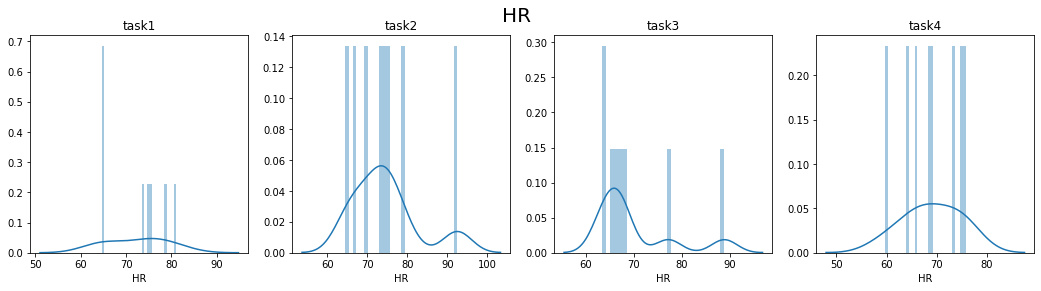

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(18, 4))

param = 'HR'

plt.suptitle(param,fontsize=20)

for i, task in enumerate(task_list):
    ax[i].set_title(task)
    
    


sns.distplot(df_task1[param], ax=ax[0], bins=30)
sns.distplot(df_task2[param], ax=ax[1], bins=30)
sns.distplot(df_task3[param], ax=ax[2], bins=30)
sns.distplot(df_task4[param], ax=ax[3], bins=30)

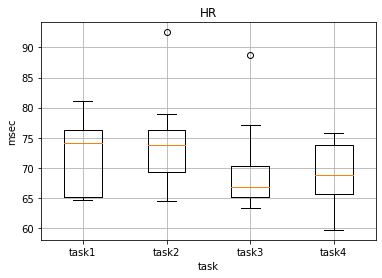

In [11]:


score = (df_task1[param], df_task2[param], df_task3[param], df_task4[param])

# 箱ひげ図
fig, ax = plt.subplots()

bp = ax.boxplot(score)
ax.set_xticklabels(['task1', 'task2', 'task3', 'task4'])

plt.title(param)
plt.xlabel('task')
plt.ylabel('msec')
plt.grid()
# Y軸のメモリのrange

<BarContainer object of 4 artists>

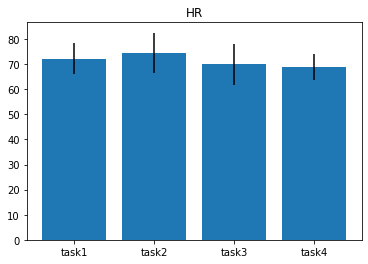

In [12]:
mu1 = np.mean(df_task1[param])
std1 = np.std(df_task1[param])
mu2 = np.mean(df_task2[param])
std2 = np.std(df_task2[param])
mu3 = np.mean(df_task3[param])
std3 = np.std(df_task3[param])
mu4 = np.mean(df_task4[param])
std4 = np.std(df_task4[param])

score = [mu1, mu2, mu3, mu4]
yerr = [std1, std2, std3, std4]

fig, ax = plt.subplots(nrows=1, ncols=1)

plt.title(param)

plt.bar(task_list, score, yerr=yerr, ecolor="black")